In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv("./original/train.csv")
test = pd.read_csv("./original/test.csv")

# データの形式を確認
print(train.shape) # (2000, 22)
print(test.shape) # (1000, 21)



(1200, 22)
(800, 21)


In [4]:
print(train.info()) 
print(train.describe()) 
print(train.isnull().sum()) # 欠損値の数を確認
print(test.info()) 
print(test.describe()) 
print(test.isnull().sum()) # 欠損値の数を確認

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1200 non-null   int64  
 1   battery_power  1200 non-null   int64  
 2   blue           1200 non-null   int64  
 3   clock_speed    1200 non-null   float64
 4   dual_sim       1200 non-null   int64  
 5   fc             1200 non-null   int64  
 6   four_g         1200 non-null   int64  
 7   int_memory     1200 non-null   int64  
 8   m_dep          1200 non-null   float64
 9   mobile_wt      1200 non-null   int64  
 10  n_cores        1200 non-null   int64  
 11  pc             1200 non-null   int64  
 12  px_height      1200 non-null   int64  
 13  px_width       1200 non-null   int64  
 14  ram            1200 non-null   int64  
 15  sc_h           1200 non-null   int64  
 16  sc_w           1200 non-null   int64  
 17  talk_time      1200 non-null   int64  
 18  three_g 

In [5]:
# 特徴量と目的変数に分ける
X_train = train.drop("price_range", axis=1)
y_train = train["price_range"]
X_test = test.copy()


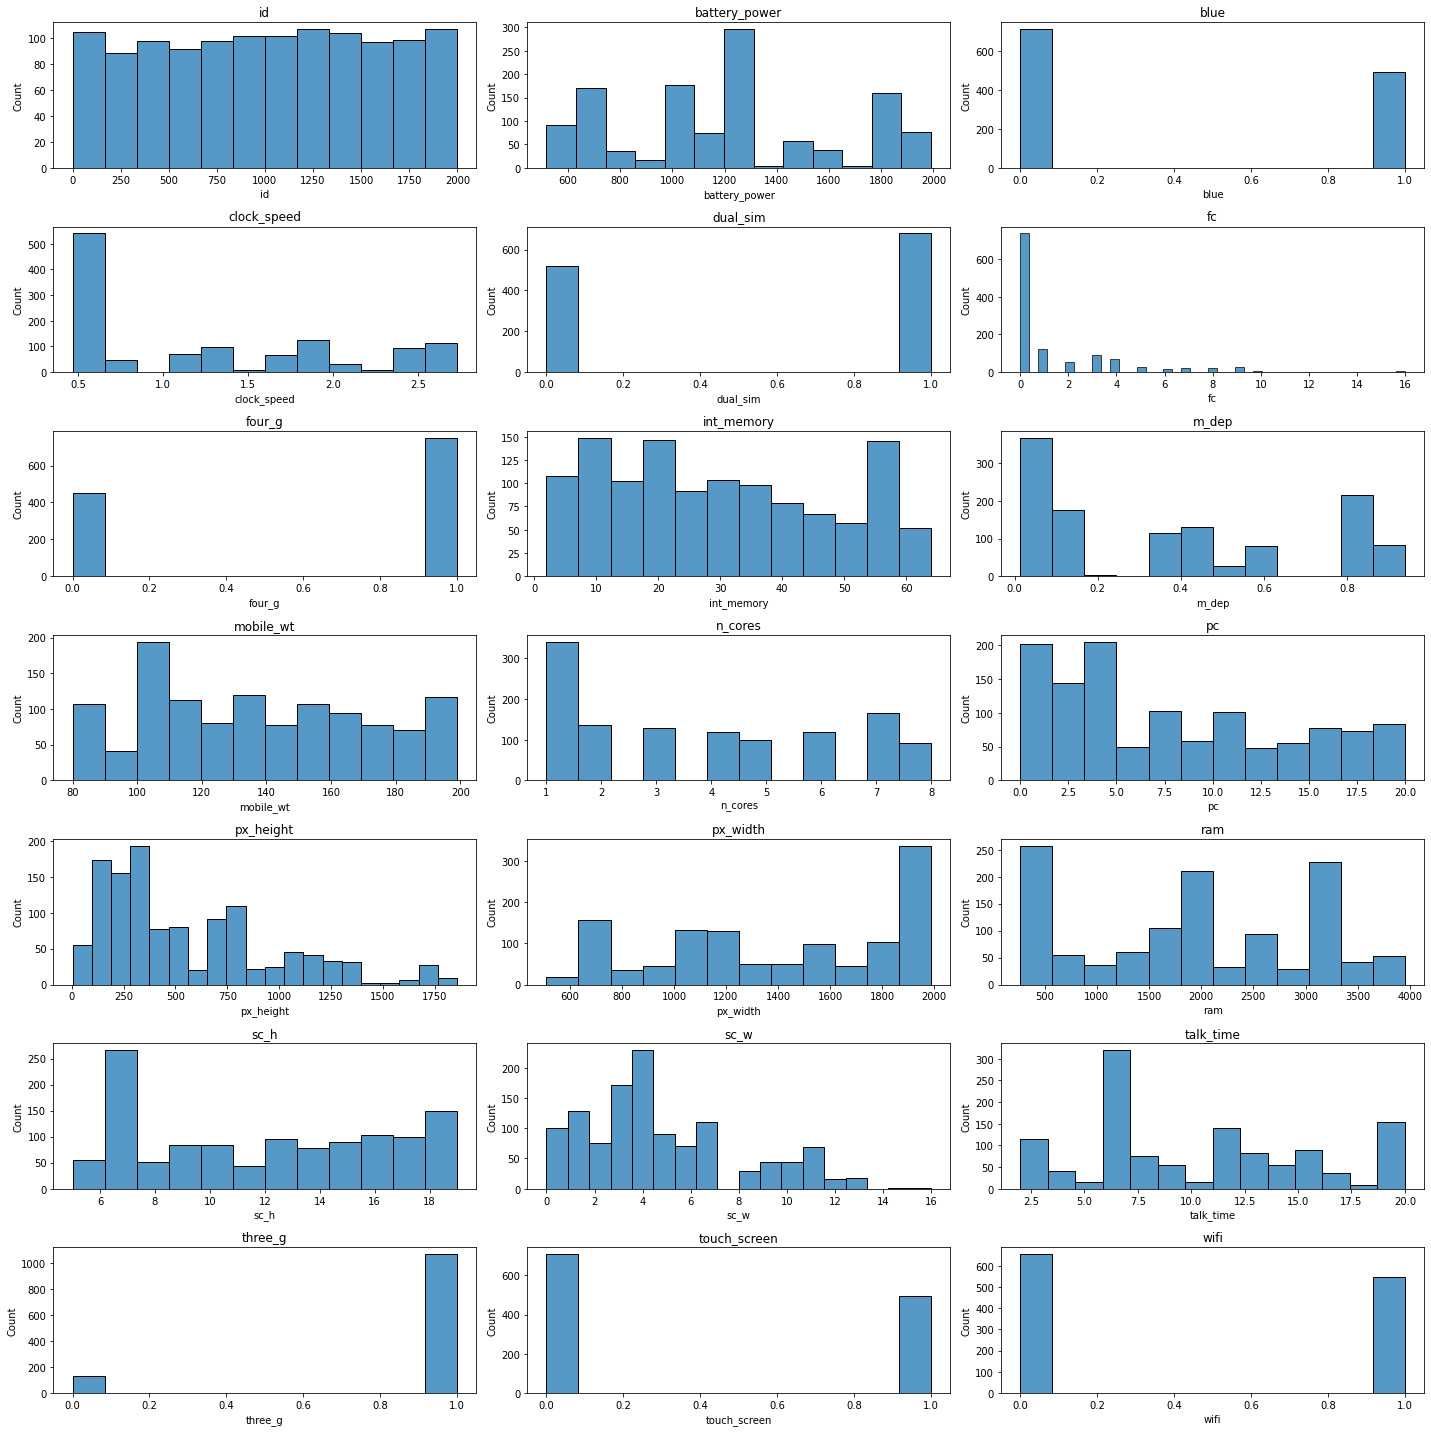

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,20))

for i, column in enumerate(X_train.columns):
    plt.subplot(7,3,i+1)
    sns.histplot(X_train[column], kde=False)
    plt.title(column)

plt.tight_layout()
plt.show()


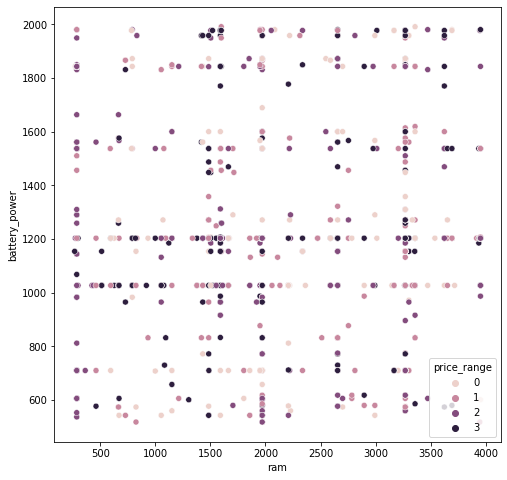

In [7]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train, x="ram", y="battery_power", hue="price_range")
plt.show()


C:\Users\so12r\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\so12r\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\so12r\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

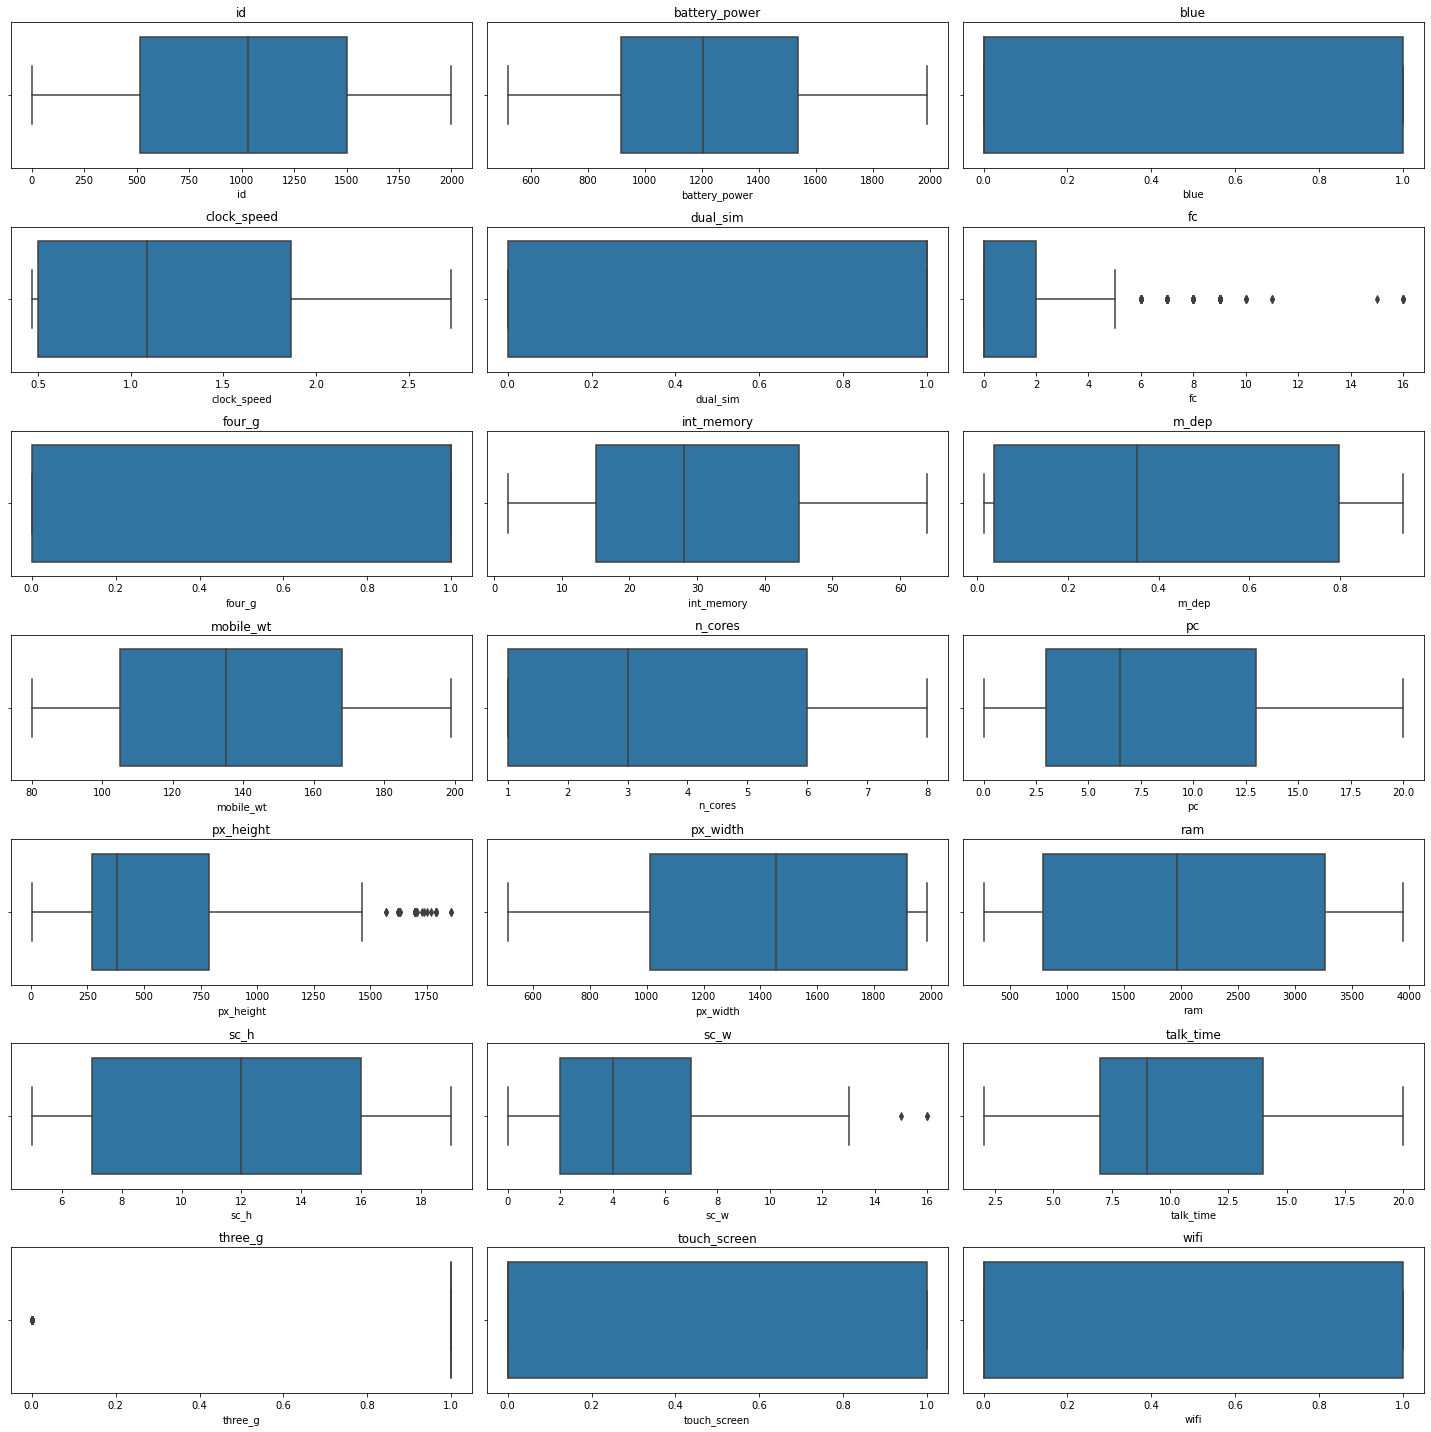

In [8]:
plt.figure(figsize=(20,20))

for i, column in enumerate(X_train.columns):
    plt.subplot(7,3,i+1)
    sns.boxplot(X_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()


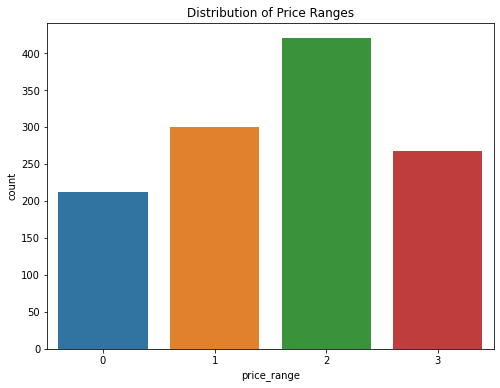

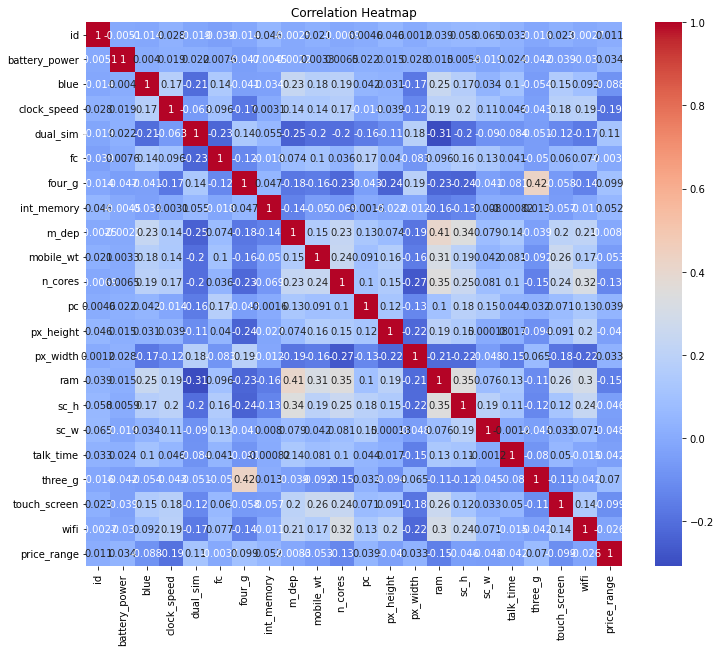

IndexError: index 5 is out of bounds for axis 0 with size 5

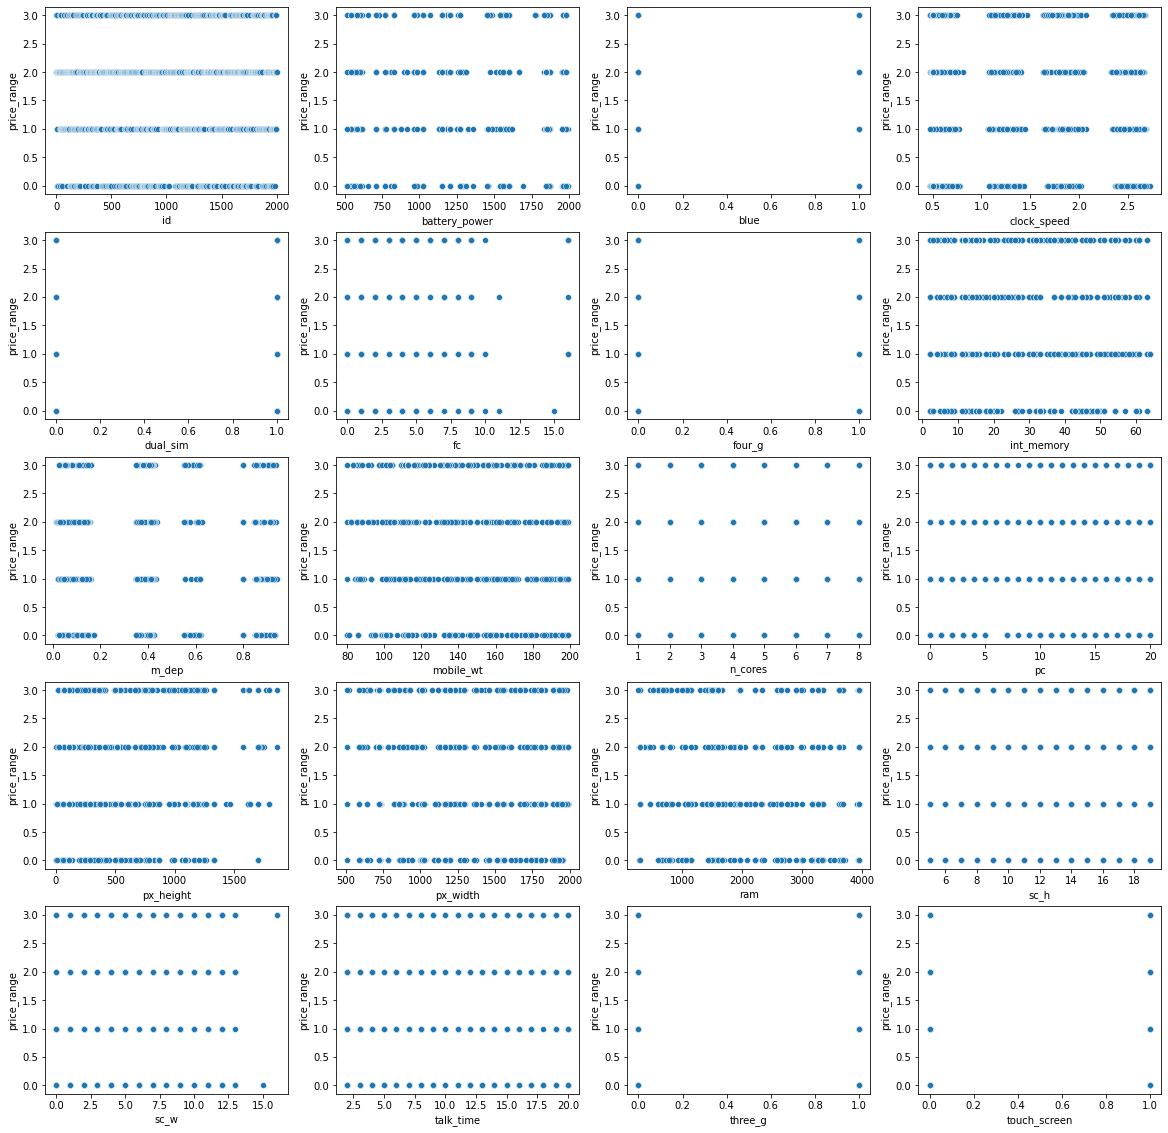

In [9]:
# 目的変数の分布を可視化
plt.figure(figsize=(8,6))
sns.countplot(x="price_range", data=train)
plt.title("Distribution of Price Ranges")
plt.show()

# 特徴量の相関関係をヒートマップで可視化
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 目的変数と特徴量の散布図を作成
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
for i, feature in enumerate(train.drop("price_range", axis=1).columns):
    sns.scatterplot(x=feature, y="price_range", data=train, ax=ax[i//4][i%4])
plt.show()

# 特徴量の重要度を可視化
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind="barh", figsize=(10,8))
plt.title("Feature Importance")
plt.show()

# 特徴量と目的変数に分ける
X_train = train.drop("price_range", axis=1)
y_train = train["price_range"]
X_test = test.copy()

# 特徴量のスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import pandas as pd

# データの読み込み
train = pd.read_csv("./original/train.csv")

# 相関係数の計算
corr_matrix = train.corr()

# 各変数の相関係数の出力
print(corr_matrix)


                     id  battery_power      blue  clock_speed  dual_sim  \
id             1.000000      -0.005127 -0.013842     0.027697 -0.019120   
battery_power -0.005127       1.000000  0.003996     0.019023  0.021815   
blue          -0.013842       0.003996  1.000000     0.173361 -0.206119   
clock_speed    0.027697       0.019023  0.173361     1.000000 -0.062715   
dual_sim      -0.019120       0.021815 -0.206119    -0.062715  1.000000   
fc            -0.039494       0.007575  0.140319     0.095958 -0.227455   
four_g        -0.013802      -0.046592 -0.040846    -0.170448  0.135709   
int_memory     0.046105      -0.004472 -0.034309     0.003136  0.054976   
m_dep         -0.002544      -0.002157  0.234187     0.143849 -0.245533   
mobile_wt      0.020675       0.003299  0.178712     0.140267 -0.202536   
n_cores       -0.006886       0.006534  0.191763     0.170709 -0.203685   
pc             0.004572       0.021607  0.042358    -0.013971 -0.164145   
px_height      0.045842  

In [ ]:

# 特徴量のスケーリング
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ランダムフォレストモデルの作成と学習
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# 評価用データの価格帯の予測
y_pred = model.predict(X_test)

# 予測結果の出力
output = pd.DataFrame({"index": test["id"], "price_range": y_pred})
output.to_csv("./submission/submission_rf_v1.csv", index=False, header=False)
